# Processamento Digital de Imagens

1001527 - Turma A

Prof. Cesar Henrique Comin

## Análise experimental de complexidade da convolução espacial e por FFT

### Equipe
Igor Teixeira Machado RA: 769708

Rafael Vinícius Passador RA: 790036

## Introdução

Dada uma imagem $f$ e um filtro $w$ de tamanho $a\times b$, a correlação-cruzada para cada pixel $(x,y)$ da imagem é calculada pela fórmula

\begin{equation}
g(x,y)=\sum_{s=0}^{a}\sum_{t=0}^{b}w(s,t)f(x+s-\frac{a}{2}, y+t-\frac{b}{2})
\end{equation}

A convolução é avaliada para todos os valores das variáveis de deslocamento x e y de modo que o centro de w visite cada pixel em f, que supõe-se ter sido preenchido. Analogamente, utiliza-se a mesma equação para calcular a convolução entre um filtro e um sinal.


A FFT y(k) de comprimento $N$ da $N-ésima$ sequência de x(n) é definida como

\begin{equation}
y(k) = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x(n) 
\end{equation}

e sua inversa é definida como

\begin{equation}
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y(k)
\end{equation}

A partir dessas equações, utiliza-se as funções de implementação da biblioteca scipy.fft, a qual aplica as equações supracitadas de convolução e FFT.

## Instalações Necessárias

* pip install numpy
* python -m pip install -U matplotlib
* pip install scipy

## Implementação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift
import timeit
import random
import os

In [2]:
def random_matrix(n,m):
    matrix = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            matrix[i][j] = random.randint(0, 255)

    return matrix

def filtroTransform(filtro, img):

    filtro = filtro/filtro.sum()

    num_rows, num_cols = img.shape
    img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', constant_values = 0)
    filt_image = np.zeros([2 * num_rows, 2 * num_cols])
    filt_image[num_rows - 3:num_rows + 4, num_cols - 3:num_cols + 4] = filtro

    filt_image = fftshift(filt_image)
    Ffilt = fft2(filt_image)
    freq_r = fftfreq(2 * num_rows)
    freq_c = fftfreq(2 * num_cols)

    Ffilt = fftshift(Ffilt)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)

    return Ffilt, freq_r, freq_c

def testeTempoExecucao(sinal, filtro, numeroExecucoes, isImg):

    #filtro, _, _ = filtroTransform(filtro, sinal)
    imagemOuSinal = "imagem: " if isImg else "sinal: "
    convolveDirect = np.zeros(sinal.shape, dtype=np.uint16)
    convolveFFT = np.zeros(sinal.shape, dtype=np.uint16)
    convolveDirect_time = timeit.timeit(convolveDirect := lambda : (signal.convolve(sinal, filtro, method='direct')), number = numeroExecucoes)
    convolveFFT_time = timeit.timeit(convolveFFT := lambda : (signal.convolve(sinal, filtro, method='fft')), number = numeroExecucoes)
    print("Tempo do método direto: %f" % convolveDirect_time + " Tamanho do " + imagemOuSinal + str(sinal.shape) +
    " Tamanho do filtro: " + str(filtro.shape))
    print("Tempo do método FFT: %f" % convolveFFT_time + " Tamanho do " + imagemOuSinal + str(sinal.shape) +
    " Tamanho do filtro: " + str(filtro.shape))
    compararTempoMetodos(convolveDirect_time, convolveFFT_time)

    return convolveDirect, convolveFFT

def compararTempoMetodos(timeDirect, timeFFT):

    print("Diferença entre os tempos: " + str(abs(timeFFT - timeDirect)))

    if timeDirect < timeFFT:
        print("Método direto é mais rápido")
    else:
        print("Método FFT é mais rápido")
    pass

In [3]:
# Filtro fixo e sinal váriavel
filtro = random_matrix(5,5)
for i in range(2, 100):
    sinal = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10, False)

Tempo do método direto: 0.000715 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.003359 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.002643899992108345
Método direto é mais rápido
Tempo do método direto: 0.000814 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.004391 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.003576999995857477
Método direto é mais rápido
Tempo do método direto: 0.000941 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.002919 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.001977799998712726
Método direto é mais rápido
Tempo do método direto: 0.001290 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.003048 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0017580999992787838
Método direto é mais rápido
Tempo do método direto: 0.001592 Ta

In [4]:
# sinal fixo e filtro variável
sinal = random_matrix(50, 50)
for i in range(2, 10):
    filtro = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10, False)

Tempo do método direto: 0.004016 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.004002 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 1.4700010069645941e-05
Método FFT é mais rápido
Tempo do método direto: 0.012767 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.003893 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.008873300001141615
Método FFT é mais rápido
Tempo do método direto: 0.015974 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.004640 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.0113343000120949
Método FFT é mais rápido
Tempo do método direto: 0.032334 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.003825 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.02850909999688156
Método FFT é mais rápido
Tempo do método direto: 0.039096 

(378, 400)
Tempo do método direto: 0.680010 Tamanho do imagem: (378, 400) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.378314 Tamanho do imagem: (378, 400) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.3016961999965133
Método FFT é mais rápido
Tempo do método direto: 1.118761 Tamanho do imagem: (378, 400) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.190231 Tamanho do imagem: (378, 400) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.9285299000039231
Método FFT é mais rápido
Tempo do método direto: 1.874032 Tamanho do imagem: (378, 400) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.226643 Tamanho do imagem: (378, 400) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 1.647388500001398
Método FFT é mais rápido
Tempo do método direto: 1.586605 Tamanho do imagem: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.183153 Tamanho do imagem: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.4034521000139648
Método FFT é mais rápido
Tempo 

C:\Users\iteix\AppData\Local\Temp\ipykernel_32196\1951882168.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 10.269274 Tamanho do imagem: (378, 400) Tamanho do filtro: (12, 12)
Tempo do método FFT: 0.174475 Tamanho do imagem: (378, 400) Tamanho do filtro: (12, 12)
Diferença entre os tempos: 10.094799799990142
Método FFT é mais rápido
Tempo do método direto: 11.370358 Tamanho do imagem: (378, 400) Tamanho do filtro: (13, 13)
Tempo do método FFT: 0.193205 Tamanho do imagem: (378, 400) Tamanho do filtro: (13, 13)
Diferença entre os tempos: 11.177153199998429
Método FFT é mais rápido
Tempo do método direto: 13.763991 Tamanho do imagem: (378, 400) Tamanho do filtro: (14, 14)
Tempo do método FFT: 0.168864 Tamanho do imagem: (378, 400) Tamanho do filtro: (14, 14)
Diferença entre os tempos: 13.595126999993226
Método FFT é mais rápido


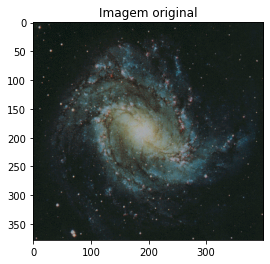

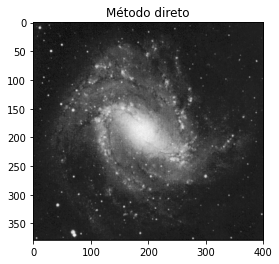

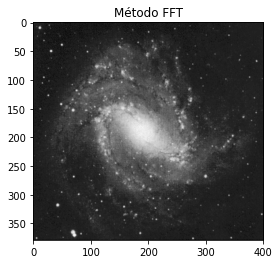

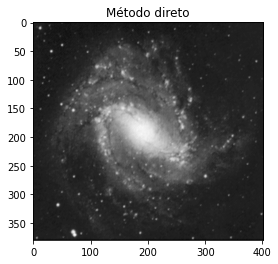

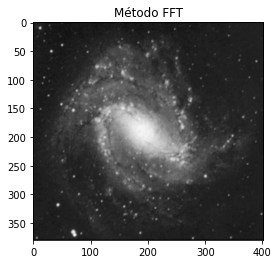

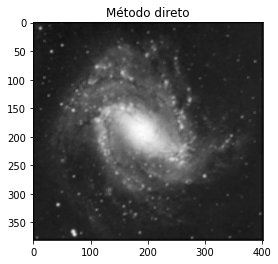

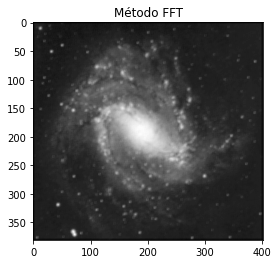

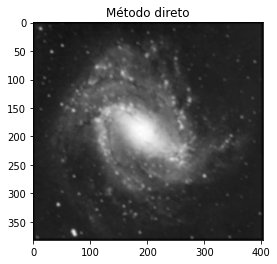

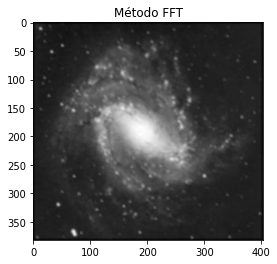

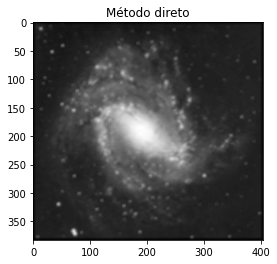

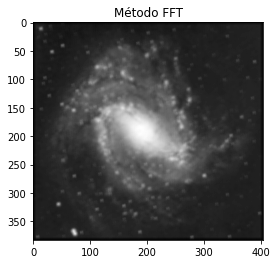

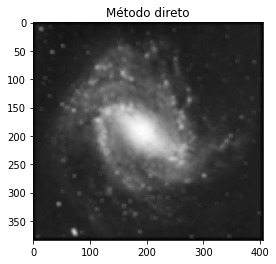

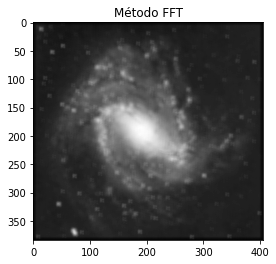

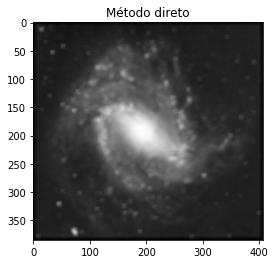

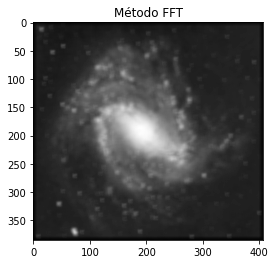

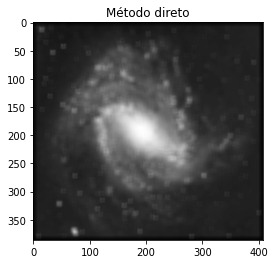

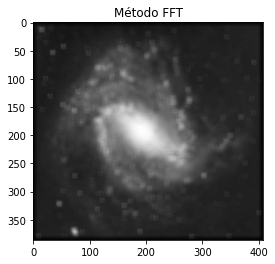

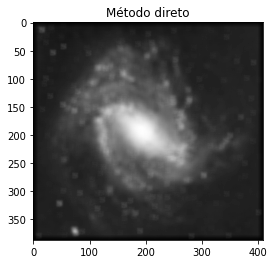

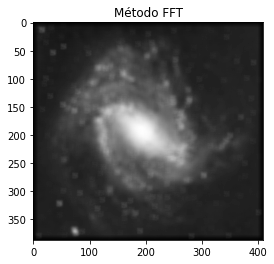

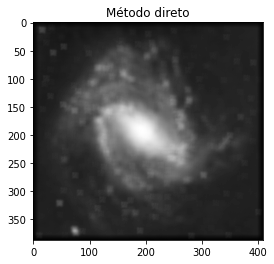

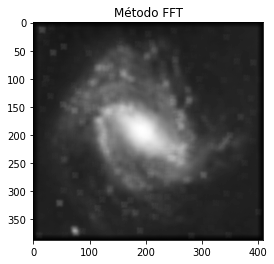

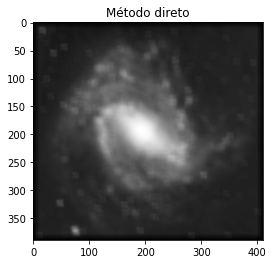

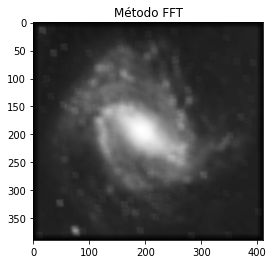

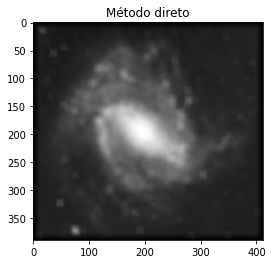

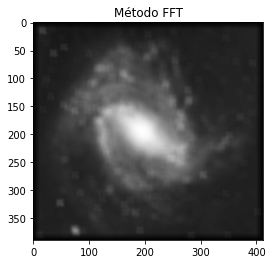

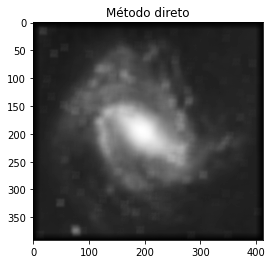

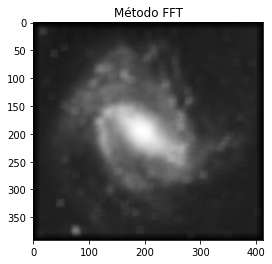

In [5]:
# imagem fixa e filtro variável
img = plt.imread('Fotos/m83.tif')
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Imagem original")
img = img[:,:,0]
print(img.shape)
for i in range(2, 15):
    filtro = random_matrix(i, i)
    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10, True)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")

Tempo do método direto: 3.333188 Tamanho do imagem: (640, 480) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.514627 Tamanho do imagem: (640, 480) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.8185615000111284
Método FFT é mais rápido
Tempo do método direto: 1.613797 Tamanho do imagem: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.173862 Tamanho do imagem: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.4399343999975827
Método FFT é mais rápido
Tempo do método direto: 2.193847 Tamanho do imagem: (537, 358) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.223827 Tamanho do imagem: (537, 358) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.970019999993383
Método FFT é mais rápido
Tempo do método direto: 3.652235 Tamanho do imagem: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.405369 Tamanho do imagem: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 3.2468660999875283
Método FFT é mais rápido
Tempo do método d

C:\Users\iteix\AppData\Local\Temp\ipykernel_32196\2675805963.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 3.516198 Tamanho do imagem: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.608363 Tamanho do imagem: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.907835399993928
Método FFT é mais rápido
Tempo do método direto: 3.335294 Tamanho do imagem: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.398471 Tamanho do imagem: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.9368233999994118
Método FFT é mais rápido
Tempo do método direto: 9.357414 Tamanho do imagem: (773, 1076) Tamanho do filtro: (5, 5)
Tempo do método FFT: 1.080686 Tamanho do imagem: (773, 1076) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 8.27672770000936
Método FFT é mais rápido


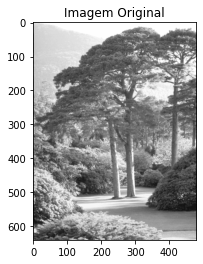

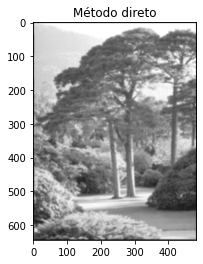

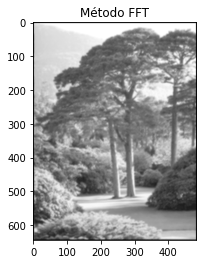

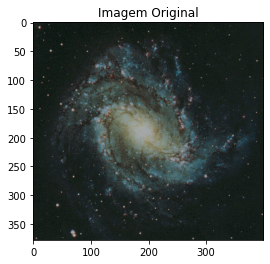

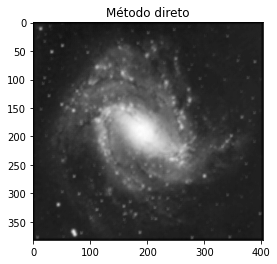

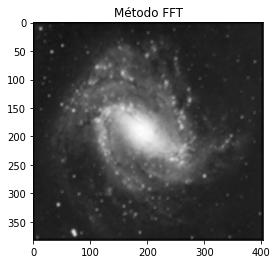

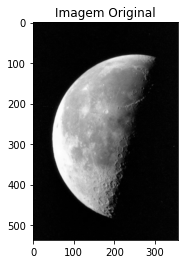

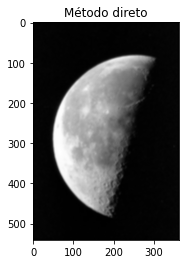

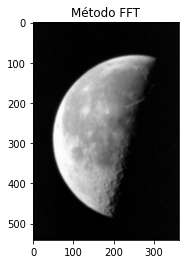

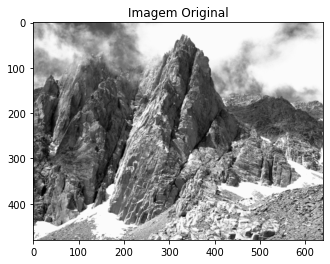

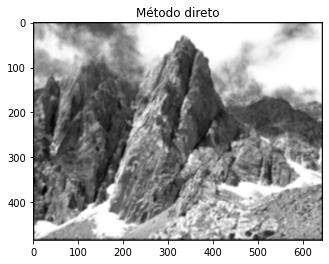

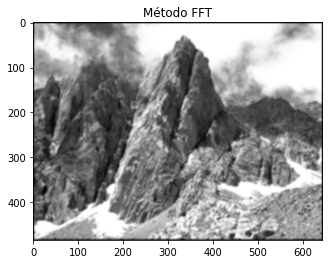

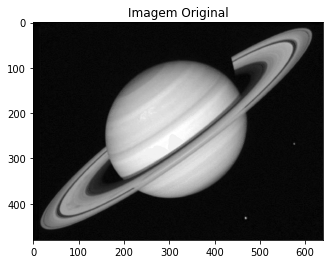

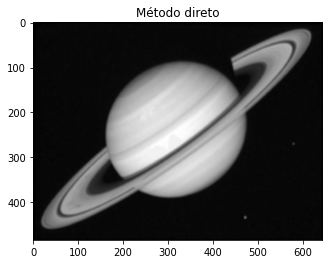

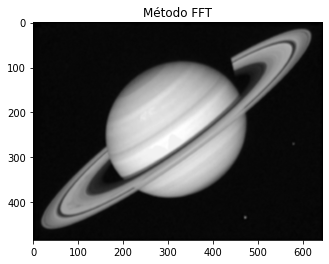

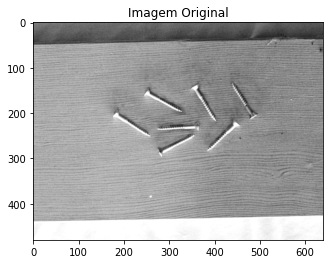

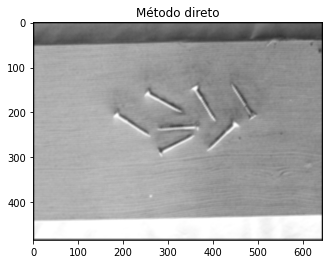

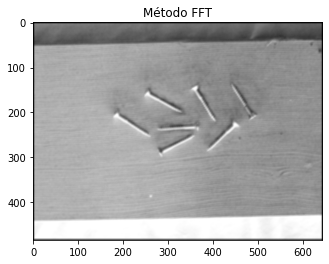

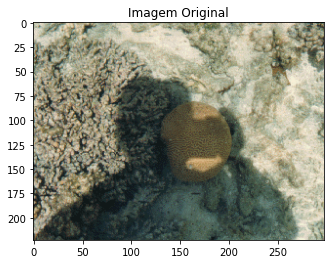

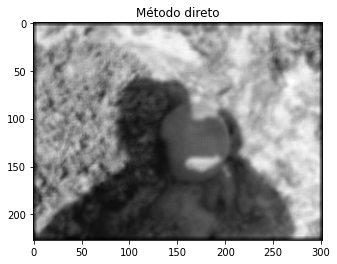

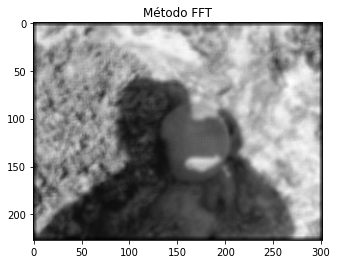

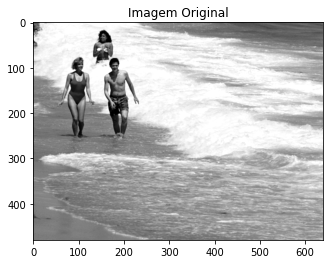

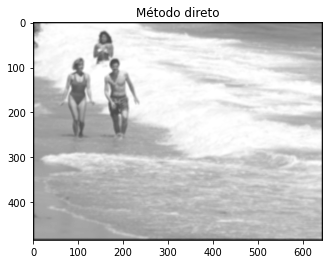

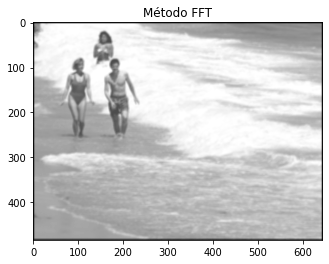

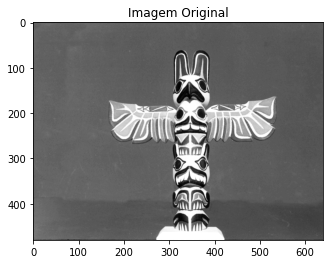

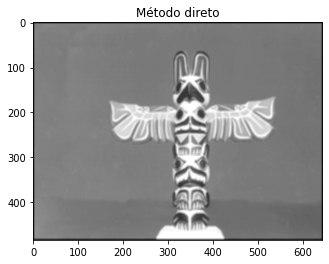

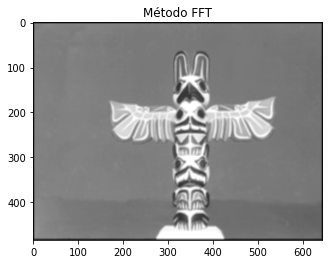

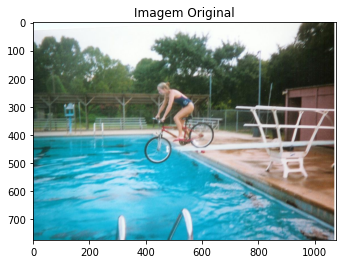

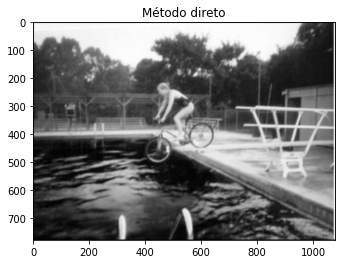

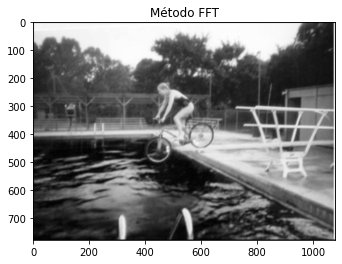

In [6]:
# imagem variável e filtro fixo
filtro = random_matrix(5,5)
for imageName in os.listdir('Fotos'):
    img = plt.imread('Fotos/' + imageName)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("Imagem Original")
    
    if img.ndim == 3:
        img = img[:,:,0]

    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10, True)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")